In [9]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [21]:
import torch
from torch.autograd import Variable
import torch.utils.data as Data

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv')

In [23]:
x = data['X']
y = data['Y']

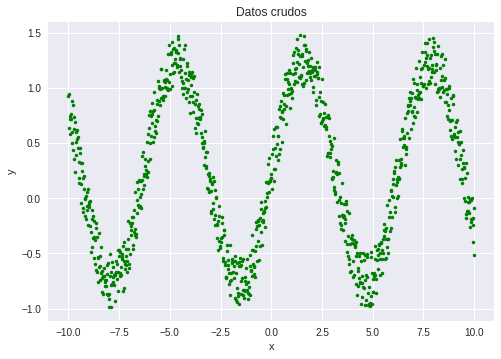

In [39]:
plt.title('Datos crudos')
plt.plot(x,y,'.g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
# 
X = Variable(torch.from_numpy(x.to_numpy())).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y.to_numpy())).float()
Y = torch.unsqueeze(Y,dim=1)

## Modelo 1

Epoch: [1/1], loss: 0.6162346601486206


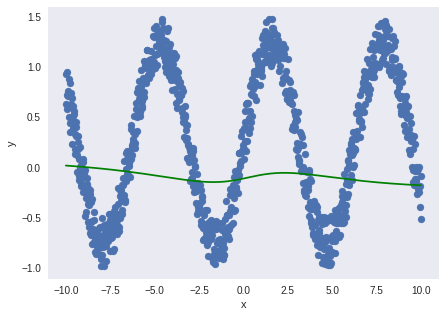

Epoch: [1/10001], loss: 0.18588227033615112


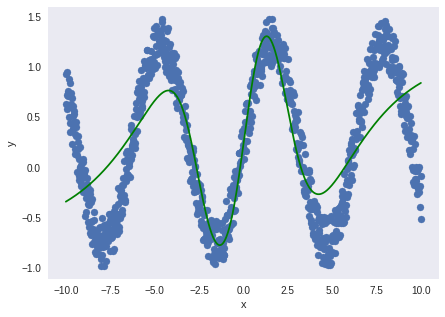

Epoch: [1/20001], loss: 0.13126051425933838


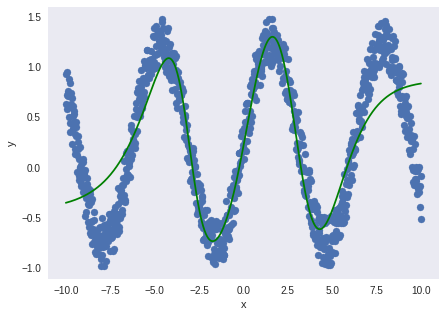

Epoch: [1/30001], loss: 0.11403721570968628


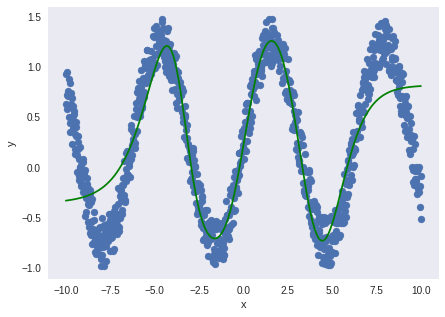

Epoch: [1/40001], loss: 0.06528517603874207


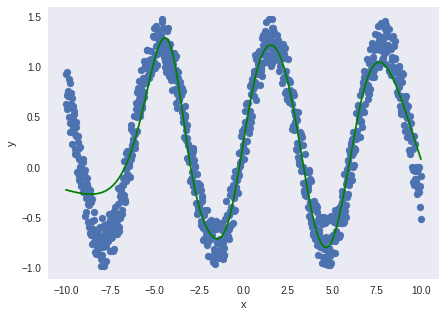

Epoch: [1/50000], loss: 0.04953338950872421


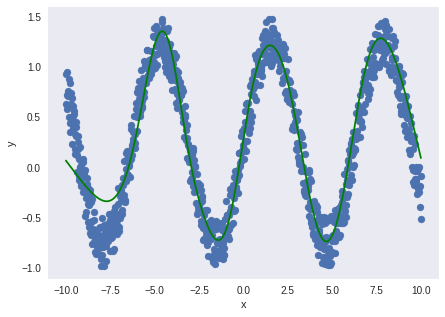

In [71]:
# Crecion del modelo 1
input_dim = 1
model_1 =torch.nn.Sequential(
    torch.nn.Linear(input_dim,10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10,input_dim)
)
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.05)
criterion_1 = torch.nn.MSELoss()
n_epoch = 50000
loss_l1 = []

for epoch in range(n_epoch):
  
  Y_pred_1 = model_1(X)

  loss = criterion_1(Y_pred_1,Y)
  loss_l1.append(loss.item())

  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()


  q=n_epoch/5

  if epoch%q==0 or epoch==n_epoch-1:
    print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
    fig = plt.figure(figsize=(7,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()  